<a href="https://colab.research.google.com/github/marifernosedal/Ejerciciospython/blob/main/MinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()
print(x)
print(y)

# Datos obtenidos de
# K.F. Riley, M. P. Hobson, S. J. Bence, 2006
# Mathematical Methods for Physics and Engineering.
# Cambridge University Press, 3rd Edition, 1363.

[1.85 2.72 2.81 3.06 3.42 3.76 4.31 4.47 4.64 4.99]
[2.26 3.1  3.8  4.11 4.74 4.31 5.24 4.03 5.69 6.57]


Pendiente (m): 1.1091488253986432
Intercepto (b): 0.38873678208868867


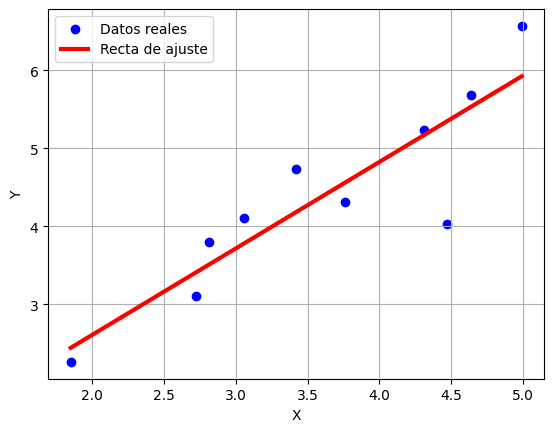

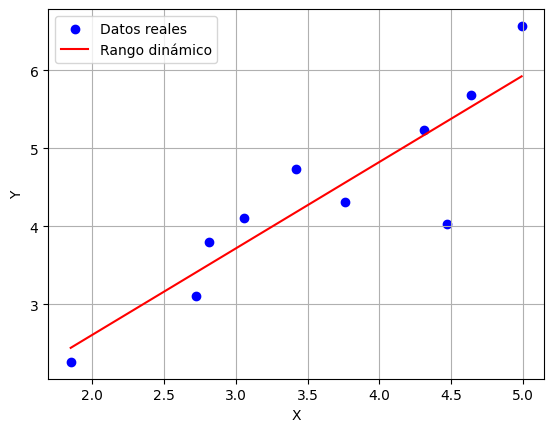

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# 1) Leer archivo CSV
# -----------------------------
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)

x = df['x'].to_numpy()
y = df['y'].to_numpy()

# -----------------------------
# 2) Calcular parámetros m y b
# -----------------------------
n = len(x)

m = (n * np.sum(x*y) - (np.sum(x) * np.sum(y))) / (n * np.sum(x**2) - (np.sum(x)**2))
b = (np.sum(y) - m * np.sum(x)) / n

print("Pendiente (m):", m)
print("Intercepto (b):", b)

# -----------------------------
# 3) Modelo de predicción
# -----------------------------
y_pred = m * x + b

# -----------------------------
# 4) Graficar datos y recta de ajuste
# -----------------------------
plt.scatter(x, y, label="Datos reales", color="blue")
plt.plot(x, y_pred, color="red", label="Recta de ajuste", linewidth=3)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# 5) Segunda gráfica con rango dinámico
# -----------------------------
plt.scatter(x, y, label="Datos reales", color="blue")
plt.plot(np.linspace(min(x), max(x)), m*np.linspace(min(x), max(x)) + b, color="red", label="Rango dinámico")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

Pendiente (m) = 1.1091488253986432
Intercepto (b) = 0.38873678208868867

Residuales: [-0.18066211 -0.30562159  0.29455502  0.32726781  0.55797424 -0.24913637
  0.07083178 -1.31663203  0.15481267  0.64661058]

Error Relativo (%): [ 7.99389863  9.85876088  7.75144786  7.96272049 11.77160833  5.78042612
  1.35175154 32.67077002  2.72078503  9.84186574]

Media = 4.385
Varianza = 0.3592404573477115
Desviación Estándar = 0.5993667135800181


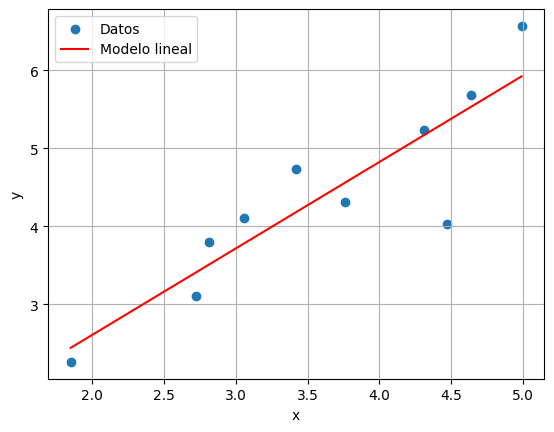

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1) Datos
# --------------------------
x=df['x'].to_numpy()
y=df['y'].to_numpy()


# --------------------------
# 2) Cálculos
# --------------------------
n = len(x)

Sumx = np.sum(x)
Sumy = np.sum(y)
Sumxy = np.sum(x*y)
Sumx2 = np.sum(x**2)

# Fórmulas del pizarrón
m = (n*Sumxy - Sumx*Sumy) / (n*Sumx2 - (Sumx**2))
b = (Sumy - m*Sumx) / n

print("Pendiente (m) =", m)
print("Intercepto (b) =", b)

# --------------------------
# 3) Modelo
# --------------------------
ymodel = m*x + b

# --------------------------
# 4) Residuales y error relativo
# --------------------------
res = y - ymodel
er = np.abs(res/y) * 100

print("\nResiduales:", res)
print("\nError Relativo (%):", er)

# --------------------------
# 5) Estadísticos
# --------------------------
media = np.mean(y)
Var = np.sum(res**2) / (n-2)
de = np.sqrt(Var)

print("\nMedia =", media)
print("Varianza =", Var)
print("Desviación Estándar =", de)

# --------------------------
# 6) Gráfica
# --------------------------
xline = np.linspace(min(x), max(x), 100)
yline = m*xline + b

plt.scatter(x,y,label="Datos")
plt.plot(xline,yline,'r',label="Modelo lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Modelo obtenido:
y = -0.0057x^2 + 1.1491x + 0.3241


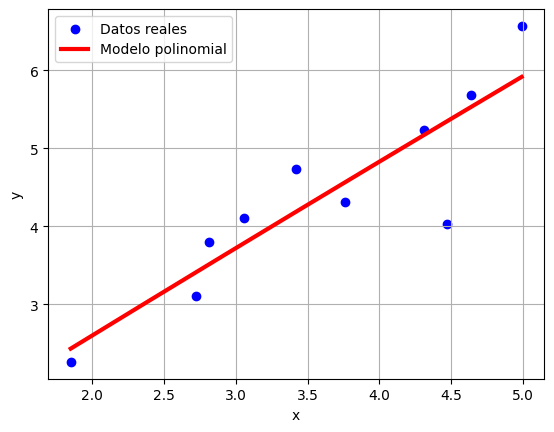

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# ----------------------------------------
# 1) Cargar los datos desde el CSV
# ----------------------------------------
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)

x = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy()

# ----------------------------------------
# 2) Crear polinomio grado 2
# ----------------------------------------
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(x)

# ----------------------------------------
# 3) Ajustar el modelo
# ----------------------------------------
model = LinearRegression()
model.fit(X_poly, y)

# ----------------------------------------
# 4) Obtener coeficientes
# ----------------------------------------
c = model.intercept_
a, b = model.coef_[2], model.coef_[1]

print("Modelo obtenido:")
print(f"y = {a:.4f}x^2 + {b:.4f}x + {c:.4f}")

# ----------------------------------------
# 5) Preparar gráfica suave
# ----------------------------------------
x_fit = np.linspace(min(x), max(x), 300).reshape(-1,1)
y_fit = model.predict(poly.transform(x_fit))

# ----------------------------------------
# 6) Graficar
# ----------------------------------------
plt.scatter(x, y, color="blue", label="Datos reales")
plt.plot(x_fit, y_fit, color="red", label="Modelo polinomial", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Modelo obtenido:
y = -0.0057x^2 + 1.1491x + 0.3241


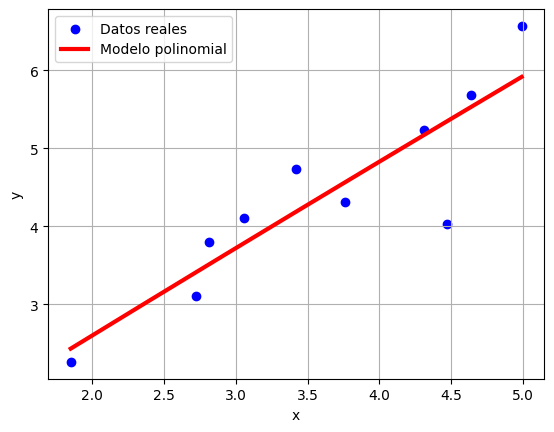

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# ----------------------------
# Datos
# ----------------------------
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)

x = df['x'].to_numpy()
y = df['y'].to_numpy()

x = x.reshape(-1,1)

poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(X_poly, y)

c = model.intercept_
a, b = model.coef_[2], model.coef_[1]

print("Modelo obtenido:")
print(f"y = {a:.4f}x^2 + {b:.4f}x + {c:.4f}")

x_fit = np.linspace(min(x), max(x), 300).reshape(-1,1)
y_fit = poly.transform(x_fit)
y_final = model.predict(y_fit)

# ----------------------------
# Graficar
# ----------------------------
plt.scatter(x, y, label="Datos reales", color="blue")
plt.plot(x_fit, y_final, label="Modelo polinomial", color="red", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Modelo obtenido:
y = -0.0057x^2 + 1.1491x + 0.3241


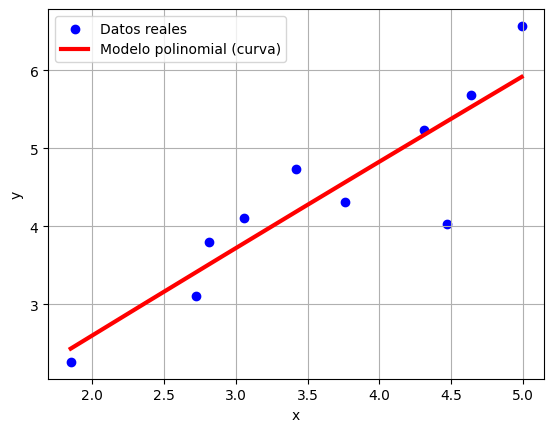

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# ----------------------------
# Datos (usa los tuyos)
# ----------------------------
x = df['x'].to_numpy()
y = df['y'].to_numpy()

x = x.reshape(-1,1)

# ----------------------------
# Modelo polinomial grado 2
# ----------------------------
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(X_poly, y)

# ----------------------------
# Obtener coeficientes
# ----------------------------
c = model.intercept_
a, b = model.coef_[2], model.coef_[1]

print("Modelo obtenido:")
print(f"y = {a:.4f}x^2 + {b:.4f}x + {c:.4f}")

# ----------------------------
# Generar puntos para la curva
# ----------------------------
x_fit = np.linspace(min(x), max(x), 300).reshape(-1,1)
y_fit = model.predict(poly.transform(x_fit))

# ----------------------------
# Gráfica final
# ----------------------------
plt.scatter(x, y, label="Datos reales", color="blue")
plt.plot(x_fit, y_fit, label="Modelo polinomial (curva)", color="red", linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()